In [54]:
import h5py as h5  #for handling data format
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [55]:
def restrict(df, col, lower_limit, upper_limit):
    mask = (df[col] >= lower_limit) & (df[col] <= upper_limit)
    return df[mask]

### 'BSE_RLOF' keys:

['Beta',
 'CEE>MT',
 'Eccentricity<MT',
 'Eccentricity>MT',
 'MT_Event_Counter',
 'Mass(1)<MT',
 'Mass(1)>MT',
 'Mass(2)<MT',
 'Mass(2)>MT',
 'MassTransferRateDonor',
 'Merger',
 'RLOF(1)<MT',
 'RLOF(1)>MT',
 'RLOF(2)<MT',
 'RLOF(2)>MT',
 'Radius(1)<MT',
 'Radius(1)>MT',
 'Radius(1)|RL<step',
 'Radius(1)|RL>step',
 'Radius(2)<MT',
 'Radius(2)>MT',
 'Radius(2)|RL<step',
 'Radius(2)|RL>step',
 'Record_Type',
 'SEED',
 'SemiMajorAxis<MT',
 'SemiMajorAxis>MT',
 'Stellar_Type(1)<MT',
 'Stellar_Type(1)>MT',
 'Stellar_Type(2)<MT',
 'Stellar_Type(2)>MT',
 'Time<MT',
 'Time>MT',
 'Zeta_Hurley(1)',
 'Zeta_Hurley(2)',
 'Zeta_Hurley_He(1)',
 'Zeta_Hurley_He(2)',
 'Zeta_Soberman(1)',
 'Zeta_Soberman(2)',
 'Zeta_Soberman_He(1)',
 'Zeta_Soberman_He(2)']

In [56]:
def load_data(filename):
    data = h5.File(filename)
    RLOF = data['BSE_RLOF']
    
    df = pd.DataFrame({
            'Merger': RLOF['Merger'][()],
            'Zeta_Hurley1': RLOF['Zeta_Hurley(1)'][()],
            'Zeta_Hurley2': RLOF['Zeta_Hurley(2)'][()],
            'Zeta_Hurley_He1': RLOF['Zeta_Hurley_He(1)'][()],
            'Zeta_Hurley_He2': RLOF['Zeta_Hurley_He(2)'][()],
            'Radius(1)|RL>step': RLOF['Radius(1)|RL>step'][()], #Ratio of star 1 radius to its RL, at the end of the timestep.
            'Radius(2)|RL>step': RLOF['Radius(2)|RL>step'][()]  #Ratio of star 2 radius to its RL, at the end of the timestep.
        })

    return df

In [65]:
def plot_histograms(df, series1, series2, kde = False): 
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    if kde:
        sns.kdeplot(df[series1], ax=axes[0])
        axes[0].set_ylabel('Density')
    else:
        sns.histplot(df[series1], ax=axes[0])
        axes[0].set_ylabel('Count')
    axes[0].set_xlabel(series1)
    axes[0].set_title('Initial distribution of mergers in RLOF')

    if kde:
        sns.kdeplot(df[series2], ax=axes[1])
        axes[1].set_ylabel('Density')
    else:
        sns.histplot(df[series2], ax=axes[1])
        axes[1].set_ylabel('Count')
    axes[1].set_xlabel(series2)
    axes[1].set_title('Initial distribution of mergers in RLOF')

    plt.tight_layout()
    plt.show()
    return

In [61]:
RLOF_df = load_data(r'/home/minjihkim/COMPAS/src/Initial_distribution/COMPAS_Output_sampled_M3to7_0.1mil.h5')
merger_RLOF_df = restrict(RLOF_df, 'Merger', 1, 1)
print('Merger/RLOF fraction: ', merger_RLOF_df.shape[0]/RLOF_df.shape[0])

Merger/RLOF fraction:  0.524452901998097


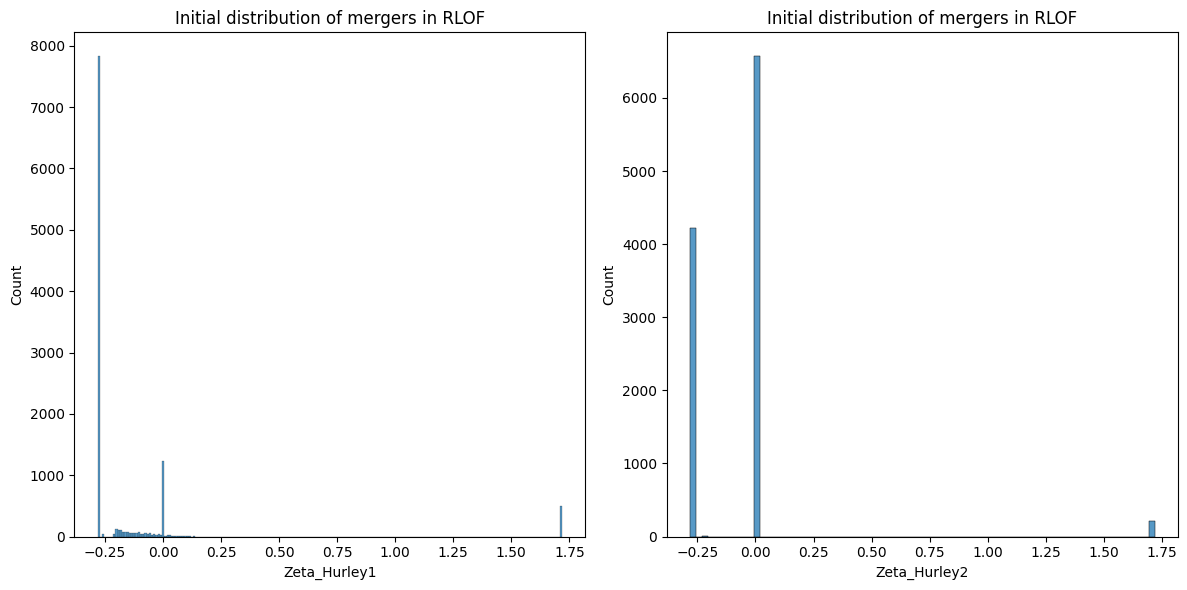

In [62]:
plot_histograms(merger_RLOF_df, 'Zeta_Hurley1', 'Zeta_Hurley2')

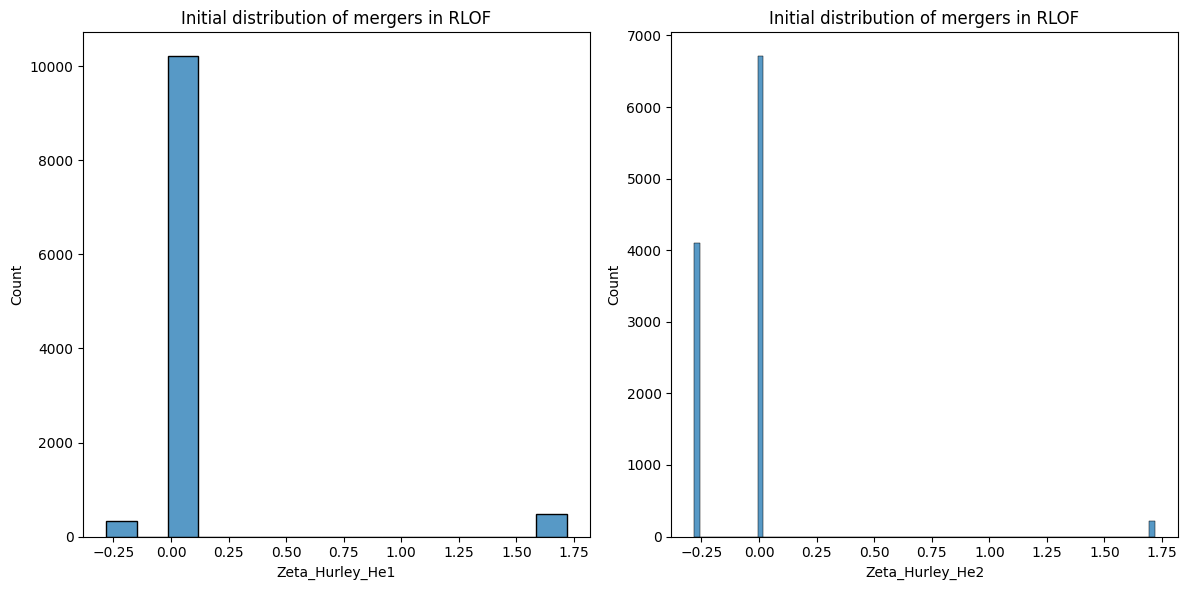

In [63]:
plot_histograms(merger_RLOF_df, 'Zeta_Hurley_He1', 'Zeta_Hurley_He2')

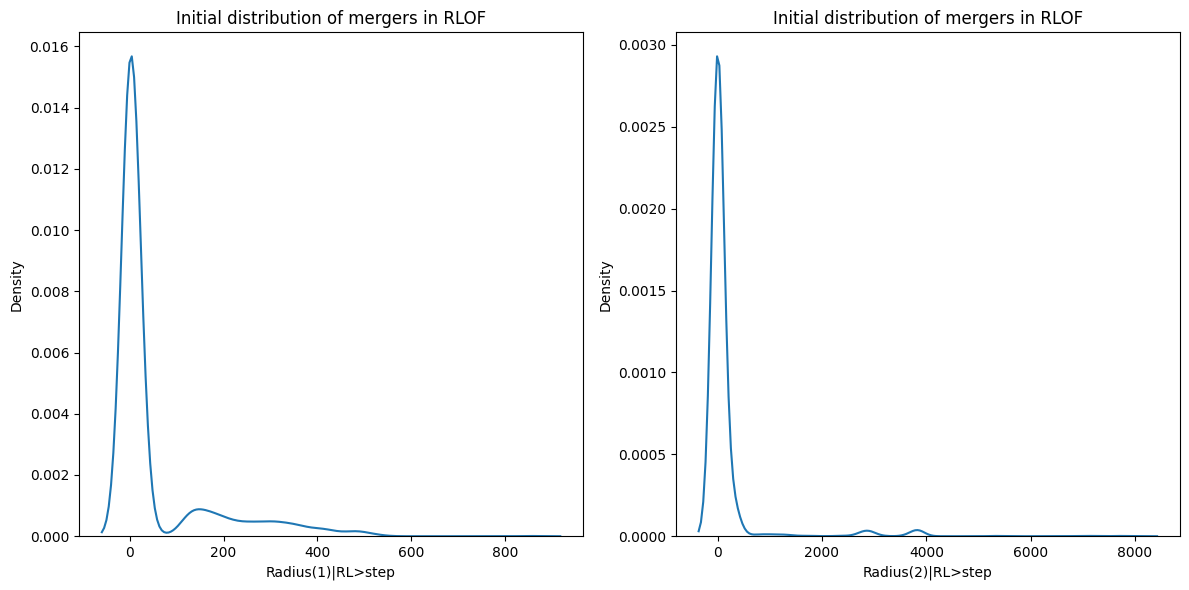

In [66]:
plot_histograms(merger_RLOF_df, 'Radius(1)|RL>step', 'Radius(2)|RL>step', kde = True)